# Fit a Lognormal Distribution
- Fit a PDF to a Lognormal distribution comparing to Beta and Triangle
- Data of top 100 US fields is from the IEA:
- https://www.eia.gov/naturalgas/crudeoilreserves/top100/
- **<u>Main Chapters:<u>**
-   Raw Data
-   Create Lognormal Distribution
-   Compare Lognormal to Beta and Triangle Distributions
-   Compare Weibull Distribution
-   Compare Lognormal PDFs fitted to Beta, Triangle and Raw Data
-   Summary Tables
-   Summary Box and Whisker plot
-   Summarize the effect of Beta's dispersion parameter (lambda) on distributions   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# SET GLOBAL STYLE PARAMETERS
plt.style.use('ggplot') # This is a global setting
plt.rcParams["figure.figsize"]=8,6  #10 x 8 is default figure size in Jupyter Notebook
plt.rcParams.update({'font.size': 12})

In [2]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    #############################################
    print('Descriptive Statistics')
    print('mean:   ','{: ,.4f}'.format(np.mean(var)))
    print('median: ','{: ,.4f}'.format(np.median(var)))
    print('mode:   ','{: ,.4f}'.format(mode))
    print('sem:    ','{: ,.4f}'.format(stats.sem(var)))
    print('min:    ','{: ,.4f}'.format(np.min(var)))
    print('max:    ','{: ,.4f}'.format(np.max(var)))
    print('stdev:  ','{: ,.4f}'.format(np.std(var)))
    print('skew:   ','{: ,.4f}'.format(skew(var)))
    print('kurt:   ','{: ,.4f}'.format(kurtosis(var)))
    print('p05:    ','{: ,.4f}'.format(np.percentile(var,5)))
    print('p95:    ','{: ,.4f}'.format(np.percentile(var,95)))
    print('count:  ','{: ,.4f}'.format(np.count_nonzero(var)))


In [37]:
from array import *
def Product(arr):
    p = 1
    for i in arr:
        p *= i
    print("Product: ", p)
 
arr = array('f', [4.1, 5.2, 6.3])
Product(arr)

Product:  134.31599601554856


In [88]:

# Create a function to do descriptive statistics
from array import *
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
    


def stats_array(var):
    # Find the mode (ml) using a detailed histogram
    n, bins, patches=plt.hist(var, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    ######################################
    mean   =np.mean(var)
    median =np.median(var)
    std    =stats.sem(var)
    Min    =np.min(var)
    Max    =np.max(var)
    std    =np.std(var)
    #skew   =skew(var)
    kurt   =kurtosis(var)
    p05    =np.percentile(var,5)
    p95    =np.percentile(var,95)
    n      =np.count_nonzero(var)
comb =[mean, median, mode, std, Min, Max, std, kurt, p05, p95, n ]
print(comb)



[11652.36170212766, 5707.5, 3390.88, 15449.093137918004, 307, 99787, 15449.093137918004, 13.81808656713758, 2073.6, 31514.549999999967, 94]


## Raw Data: USA top 100 fields Reserves

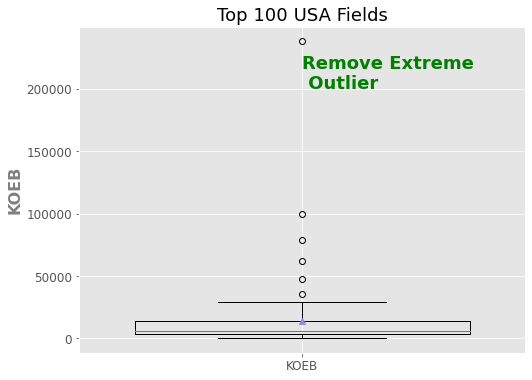

Descriptive Statistics of KOEB
Descriptive Statistics
mean:     14,035.4947
median:   5,755.0000
mode:     3,397.6590
sem:      2,862.1122
min:      307.0000
max:      238,050.0000
stdev:    27,749.2069
skew:     6.0395
kurt:     43.1201
p05:      2,076.8000
p50:      5,755.0000
p95:      38,873.7000
count:    95.0000

 Descriptive Statistics of Z-Scores
Descriptive Statistics
mean:    -0.0000
median:  -0.2984
mode:    -0.3834
sem:      0.1031
min:     -0.4947
max:      8.0728
stdev:    1.0000
skew:     6.0395
kurt:     43.1201
p05:     -0.4310
p50:     -0.2984
p95:      0.8951
count:    95.0000


In [3]:
oeb=[238050,99787,79080,47259,62046,29487,15833,19996,23703,27346,19587,11665,25793,18291,28766,25494,1187,8492,
   17587,19396,15880,12922,35280,8930,13801,24808,23832,5452,3782,7825,307,4912,11793,5335,13496,6424,4051,5498,
   4011,7106,23360,8186,14306,7277,3694,10242,2476,5755,6116,3519,4407,7229,8808,8294,3737,5115,3441,4930,2348,
   4820,8226,3925,4308,3223,2563,6730,7484,21206,3093,3586,5660,5044,10421,2032,3516,3187,2415,3464,5111,4024,4131,
   2733,3840,4010,8247,3378,1790,1937,2270,3319,2251,6151,3325,2326,2096]
koeb=np.array(oeb)

from scipy import stats
zscore = stats.zscore(koeb)

plt.boxplot(koeb, widths=.75, showmeans=True) # patch_artist=True
plt.xticks([1], ['KOEB'])
#plt.ylim(0, 20000)
plt.title("Top 100 USA Fields", fontsize=18)
plt.ylabel('KOEB', fontsize =16, fontweight='bold', color='gray')
plt.text(1, 200000, 'Remove Extreme \n Outlier',
        {'color':'green','weight':'heavy','size':18})
plt.show()

print("Descriptive Statistics of KOEB")
my_stats(koeb)
print('\n', "Descriptive Statistics of Z-Scores")
my_stats(zscore)


### Remove Extreme Outlier at 238,050 KBOE

In [4]:
koeb = koeb[koeb < np.max(koeb)]
my_stats(koeb)

Descriptive Statistics
mean:     11,652.3617
median:   5,707.5000
mode:     3,390.8800
sem:      1,601.9963
min:      307.0000
max:      99,787.0000
stdev:    15,449.0931
skew:     3.4035
kurt:     13.8181
p05:      2,073.6000
p50:      5,707.5000
p95:      31,514.5500
count:    94.0000


### Visually compare histogram of koeb and natural log of koeb
- Are the data actually Lognormal?
- Compare histograms of the raw data and the natual log of raw data
- I think with the small sample size of 94 fields, we can assume that the distribution is probably Lognormal

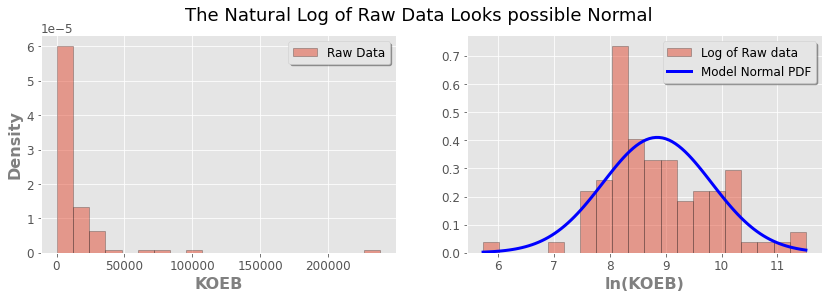

STATS of RAW DATA (KOEB)
Descriptive Statistics
mean:     11,652.3617
median:   5,707.5000
mode:     3,390.8800
sem:      1,601.9963
min:      307.0000
max:      99,787.0000
stdev:    15,449.0931
skew:     3.4035
kurt:     13.8181
p05:      2,073.6000
p50:      5,707.5000
p95:      31,514.5500
count:    94.0000
Descriptive Statistics
mean:     8.8472
median:   8.6495
mode:     8.3007
sem:      0.1009
min:      5.7268
max:      11.5108
stdev:    0.9729
skew:     0.2827
kurt:     0.4895
p05:      7.6369
p50:      8.6495
p95:      10.3545
count:    94.0000
None None


In [89]:
from scipy.stats import norm

lkoeb=np.log(koeb)
n_mean = np.mean(lkoeb)
n_std = np.std(lkoeb)
n_min = np.min(lkoeb)
n_max = np.max(lkoeb)

# Calculate random values from the Standard Normal distirubion and the PDF
nvals = norm.rvs(loc=n_mean, scale=n_std, size=10000)
nx=np.linspace(n_min, n_max, 100)
ny=norm.pdf(nx, n_mean, n_std)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.hist(oeb, bins=20, density=True, edgecolor='k', alpha=.5, label='Raw Data')
ax2.hist(lkoeb, bins=20, density=True, edgecolor='k', alpha=.5, label='Log of Raw data')
ax2.plot(nx, ny, c='b', lw=3, label='Model Normal PDF')
ax1.set_xlabel('KOEB', fontsize =16, fontweight='bold', color='gray')
ax2.set_xlabel('ln(KOEB)', fontsize =16, fontweight='bold', color='gray')
ax1.set_ylabel('Density', fontsize =16, fontweight='bold', color='gray')
ax1.legend(shadow=True)
ax2.legend(shadow=True)
plt.suptitle("The Natural Log of Raw Data Looks possible Normal", fontsize=18)
plt.show()    

print("STATS of RAW DATA (KOEB)")
print(my_stats(koeb), my_stats(lkoeb))

## Create Lognormal Distribution

### Extract Lognormal Shape Parameters from the Raw Data


In [6]:
#Lognormal Distribution
from scipy.stats import lognorm

# Extract the gamma model shape parameters for the lognormal distribution
shape, loc, scale =lognorm.fit(koeb, floc=0)

print("Lognormal Parameters")
print('Loc (Min):     ', np.round(loc,1))
print('Scale (Mu):    ', np.round(scale,1))
print('Shape (sigma): ', np.round(shape,1),'\n')
# print("STATS ON RAW DATA")
# print("=================")
#my_stats(koeb)


Lognormal Parameters
Loc (Min):      0.0
Scale (Mu):     6955.2
Shape (sigma):  1.0 



### Fitted and Truncated Lognormal Distribution
- The shape parameters extracted from the raw data are used to create a Lognormal distribution
- 10,000 random values and a lognormal PDF were created (lnvals) and demonstrate the right tail extends far-far beyond the Max of data
- The random lognormal values and PDF are truncated to the Min and Max of the Raw Data

Evaluate Lognormal Parmaters
Loc (Min):      0.0
Scale (Mu):     6955.2
Shape (sigma):  1.0


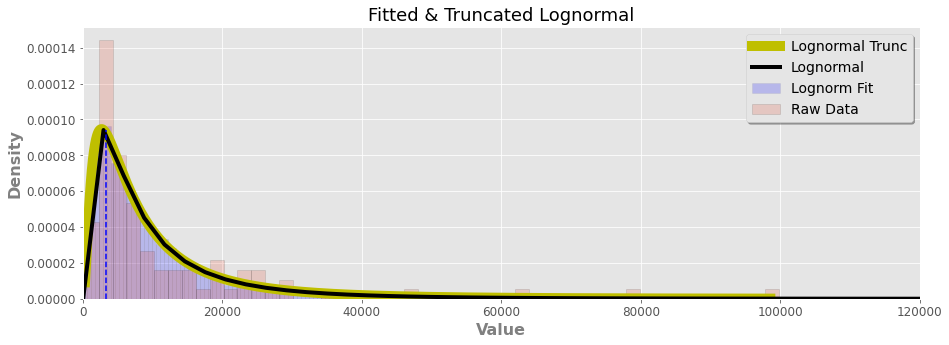

Min, ML, Max Inputs: 307 3390.88 99787 

STATS ON TRUNCATED LOGNORMAL (qln)
Descriptive Statistics
mean:     10,735.3584
median:   6,975.2229
mode:     2,198.1647
sem:      117.4473
min:      331.3271
max:      98,585.9390
stdev:    11,744.1399
skew:     2.9209
kurt:     11.7838
p05:      1,402.0895
p50:      6,975.2229
p95:      32,999.2921
count:    10,000.0000


In [7]:
import random

################ Min, ML and Max of Data ###############
min=np.min(koeb) # Min of raw data
max=np.max(koeb) # Max of raw data

# Find the most-likely (mode) of raw data
n, bins, patches=plt.hist(koeb, bins=500, edgecolor='gray', density=True, alpha=.2)
plt.close()
mode_index = n.argmax()
ml=(bins[mode_index] + bins[mode_index+1])/2
#########################################################

size=10000  # Set sample size for random values

# Min and Max Truncation Limits (You can use data min and max, or assign scalar values)
trunc_min= np.min(koeb)
trunc_max= np.max(koeb)


# Create Lognormal Random Values and report shape parameters
lnvals =lognorm.rvs(shape, loc=loc, scale=scale, size=size, random_state=None)
print("Evaluate Lognormal Parmaters")
print('Loc (Min):     ', np.round(loc,1))
print('Scale (Mu):    ', np.round(scale,1))
print('Shape (sigma): ', np.round(shape,1))

# Create a Lognormal PDF
lnmin=np.min(lnvals) # Needed for the x-axis calculation
lnmax=np.max(lnvals) # Needed for the x-axis calculation
lnx = np.linspace(lnmin, lnmax, 100)
lny = lognorm.pdf(lnx, shape, loc=loc, scale=scale)

###################################################################
#TRUNCATION METHOD OF MIDDLETON FOR NORMAL DISTRIBUTIONS
# Note: Python does not have a built-in Lognormal truncation fuctions, so its calaculated below
###################################################################
#trunc_min= np.min(koeb)  #Initialized above
#trunc_max= np.max(koeb)  #Initialized above

# Calculate the Percent Point Function to calculate the quantile values (i.e., X values of inverse cdf)
qln=np.sort(lognorm.ppf(lognorm.cdf(trunc_min, shape, loc=loc, scale=scale) + np.random.uniform(.0001, .9999, size)
                    *(lognorm.cdf(trunc_max, shape, loc=loc, scale=scale)
                     - lognorm.cdf(trunc_min, shape, loc=loc, scale=scale)), shape, loc=loc, scale=scale))
tlny=lognorm.pdf(qln, shape,loc=loc, scale=scale)
###################################################################

# Plot Data
fig = plt.figure(figsize=(15,5))
plt.plot(qln, tlny, lw=10, c='y', label='Lognormal Trunc')
plt.plot(lnx, lny,lw=4, c='k', alpha=1, label='Lognormal')
plt.hist(lnvals, bins=500, color='b', edgecolor='gray', density=True, alpha=.2, label='Lognorm Fit')
plt.hist(koeb, bins=50, edgecolor='k', density=True, alpha=.2, label='Raw Data')
plt.xlim(0, 120000)
#plt.xscale('log')
plt.title('Fitted & Truncated Lognormal', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(fontsize=14, shadow=True)
plt.vlines(ml, np.min(lny), np.max(lny), color='b', ls='--', label="Most-Likely Lognorm")
plt.show()
print("Min, ML, Max Inputs:", min, ml, max, "\n")
print("STATS ON TRUNCATED LOGNORMAL (qln)")
print("=======================================")
my_stats(qln)


## Compare Lognorm to Beta and Triangle
- <u>Basic Formulas used for a Triangle Distribution<u>
- c = (mode - left) / (right - left)
- loc = left
- scale = right - left

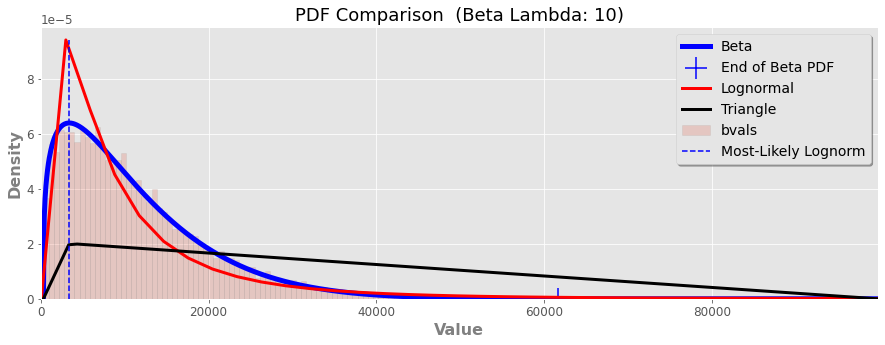

THE LOGNORMAL AND TRIANGLE RIGHT TAILS EXTEND FURTHER THAN THE MAX BETA AT  61,691


In [8]:
# Calc Beta and Triangle Distributions

from scipy.stats import beta
from scipy.stats import triang

#Triangle Distribution
c=(ml-min)/(max-min)

tx = np.linspace(min, max, 100)
ty = triang.pdf(tx, c, loc=min, scale=max-min)
tvals=triang.rvs(c, loc=min, scale=max-min, size=size, random_state=None)


# Beta Distribution
L = 10  #Default gamma is 4. Smaller values flatten and large vaues peak
a=1+L*(ml-min)/(max-min)
b=1+L*(max-ml)/(max-min)

bx = np.linspace(min, max, 1000)
by = beta.pdf(bx, a, b, loc=min, scale=max-min)
bvals =beta.rvs(a, b, loc=min, scale=max-min, size=size, random_state=None)

fig = plt.figure(figsize=(15,5))
plt.plot(bx, by,lw=5, c='b', label="Beta")
plt.scatter(np.max(bvals), np.min(by), marker='+', s=500, c='b', label="End of Beta PDF")
plt.plot(lnx, lny,lw=3, c='r', label='Lognormal')
plt.plot(tx, ty,lw=3, c='k', label='Triangle')
plt.hist(bvals, bins=100, edgecolor='gray', density=True, alpha=.2, label='bvals')
plt.title('PDF Comparison  (Beta Lambda: ' + str(L)+')', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.xlim(0,max)
plt.vlines(ml, np.min(lny), np.max(lny), color='b', ls='--', label="Most-Likely Lognorm")
plt.legend(shadow=True, fontsize=14)
plt.show()
print("THE LOGNORMAL AND TRIANGLE RIGHT TAILS EXTEND FURTHER THAN THE MAX BETA AT", '{: ,.0f}'.format(np.max(bvals)))


## Compare Weibull Distribution
- Three parameters: Shape(c), Loc and Scale (These parameters can be extracted from data using **weibull_min.fit**
- A shape(c) parameter = 1 is Exponential and a shape(c) parameter = 2 is a Rayleigh distribution
- When fitted to the KOEB data, the Weibull resolves to an Exponential distribution.
- However, when fitted to the Beta random values (bvals), the Weibull is similar to the Beta curve.
- The Scipy library also has weibull_max and wiebull_exponential functions used for particular applications
- The **weibull_min** function is the "*usual*" most commonly used function.

Weibull Shape (c), Loc and Scale: 0.9726243244979087 0 11480.825445709108


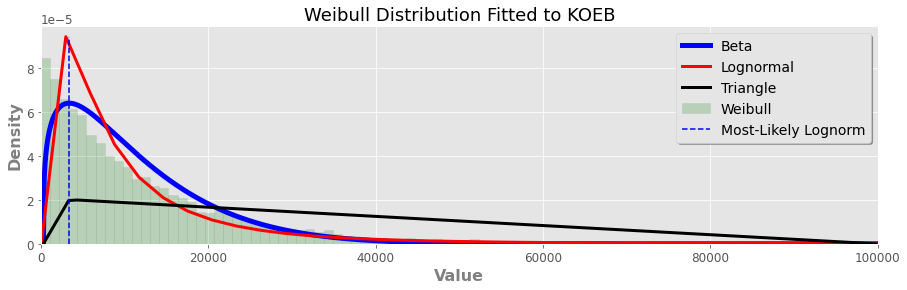

THE LOGNORMAL AND TRIANGLE RIGHT TAILS EXTEND FURTHER THAN THE MAX WEIBULL AT  108,951
STATS FOR WEIBULL DISTRIBUTION
Descriptive Statistics
mean:     11,877.2439
median:   8,113.3011
mode:     109.1704
sem:      120.4583
min:      0.2195
max:      108,951.0660
stdev:    12,045.2269
skew:     2.0474
kurt:     6.3593
p05:      537.6285
p50:      8,113.3011
p95:      35,473.9907
count:    10,000.0000


In [9]:
from scipy.stats import weibull_min

wshape, wloc, wscale = weibull_min.fit(koeb, floc=0)
#wshape, wloc, wscale = weibull_min.fit(bvals, floc=0)
print('Weibull Shape (c), Loc and Scale:', wshape, wloc, wscale)

wvals= weibull_min.rvs(wshape, loc=wloc, scale=wscale, size=size, random_state=None)
wx = np.linspace(min, max, 1000)
wy = weibull_min.pdf(wx, wshape, loc=wloc, scale=wscale)

fig = plt.figure(figsize=(15, 4))
plt.plot(bx, by,lw=5, c='b', label="Beta")
plt.plot(lnx, lny,lw=3, c='r', label='Lognormal')
plt.plot(tx, ty,lw=3, c='k', label='Triangle')
plt.hist(wvals, bins=100, edgecolor='gray', color='g', density=True, alpha=.2, label='Weibull')
plt.title('Weibull Distribution Fitted to KOEB', fontsize=18)
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.xlim(0,100000)
plt.vlines(ml, np.min(lny), np.max(lny), color='b', ls='--', label="Most-Likely Lognorm")
plt.legend(shadow=True, fontsize=14)
plt.show()
print("THE LOGNORMAL AND TRIANGLE RIGHT TAILS EXTEND FURTHER THAN THE MAX WEIBULL AT", '{: ,.0f}'.format(np.max(wvals)))

print("STATS FOR WEIBULL DISTRIBUTION")
my_stats(wvals)

## Compare Lognormal PDFs Fitted to Beta, Triangle and Raw Data
- Lognormal shape paramters were extracted from the raw data, the Beta and the Triangle random values
- The Lognormal parameters from the Raw Data and Beta random values produce PDFs with similar shape
- The Lognormal parameters from the Triangle random value produce a PDF with a much larger mode

Fit     Shape  Scale
======  =====  =====
koeb:   0.973  6955
bvals:  1.000  7600
tvals:  0.921  24822


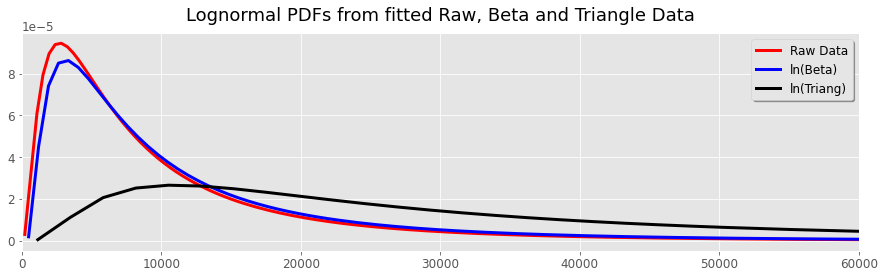

In [10]:
# Extract fit parameters for a lognormal distribution from raw data, beta distribution, triangle distribution
k_shape, k_loc, k_scale =lognorm.fit(koeb, floc=0)
b_shape, b_loc, b_scale =lognorm.fit(bvals, floc=min)
t_shape, t_loc, t_scale =lognorm.fit(tvals, floc=min)

# Generate random values for lognormal from raw data, Beta and Triangle distributions
k_lnvals =lognorm.rvs(k_shape, loc=k_loc, scale=k_scale, size=size, random_state=None)
b_lnvals =lognorm.rvs(b_shape, loc=b_loc, scale=b_scale, size=size, random_state=None)
t_lnvals =lognorm.rvs(t_shape, loc=t_loc, scale=t_scale, size=size, random_state=None)

# Calculate Lognormal distributions for raw data, Beta and Triangle distributions
kln_x = np.linspace(np.min(k_lnvals), np.max(k_lnvals), 1000)
kln_y = lognorm.pdf(kln_x, k_shape, loc=k_loc, scale=k_scale)

bln_x = np.linspace(np.min(b_lnvals), np.max(b_lnvals), 1000)
bln_y = lognorm.pdf(bln_x, b_shape, loc=b_loc, scale=b_scale)

tln_x = np.linspace(np.min(t_lnvals), np.max(t_lnvals), 1000)
tln_y = lognorm.pdf(tln_x, t_shape, loc=t_loc, scale=t_scale)

# Plot PDFs for comparison
fig = plt.figure(figsize=(15,4))
plt.plot(kln_x, kln_y, c='r', lw=3, label="Raw Data")
plt.plot(bln_x, bln_y, c='b', lw=3, label="ln(Beta)")
plt.plot(tln_x, tln_y, c='k', lw=3, label="ln(Triang)")
plt.xlim(0, 60000)
plt.legend(shadow=True)
plt.title("Lognormal PDFs from fitted Raw, Beta and Triangle Data", y=1.03, fontsize=18)

print("Fit     Shape  Scale")
print("======  =====  =====")
print("koeb: ",'{: .3f}'.format(k_shape), '{: .0f}'.format(k_scale))
print("bvals:",'{: .3f}'.format(b_shape), '{: .0f}'.format(b_scale))
print("tvals:",'{: .3f}'.format(t_shape), '{: .0f}'.format(t_scale))

## Summary Table (Descriptive Statistics)

In [11]:
from scipy.stats import skew
from scipy.stats import kurtosis

# Find the mode (ml) using a detailed histogram
m_list=[bvals, tvals, wvals, lnvals, koeb, b_lnvals, t_lnvals]
out=[]
for i in m_list:
    n, bins, patches=plt.hist(i, bins=500, edgecolor='gray', density=True, alpha=.2)
    plt.close()
    mode_index = n.argmax()
    mode=(bins[mode_index] + bins[mode_index+1])/2
    out.append(mode)

mode_bvals=out[0]
mode_tvals=out[1]    
mode_wvals=out[2]
mode_lnvals=out[3]
mode_koeb=out[4]
mode_b_lnvals=out[5]
mode_t_lnvals=out[6]

#print(int(mode_bvals), int(mode_tvals), int(mode_wvals), int(mode_lnvals), 
#      int(mode_koeb), int(mode_b_lnvals), int(mode_t_lnvals))


# Create Summary Table
d = {'DisType' : ['Beta', 'Triangle', 'Weibull', 'Lognormal', 'KOEB', 'Lognorm(Beta)', 'lognorm(Triag)'],
     'mean': [np.mean(bvals), np.mean(tvals), np.mean(wvals), np.mean(lnvals), np.mean(koeb),np.mean(b_lnvals),np.mean(t_lnvals)],
     'median':  [np.median(bvals), np.median(tvals), np.median(wvals), np.median(lnvals), np.median(koeb),np.median(b_lnvals),np.median(t_lnvals)],     
     'mode': [np.round(mode_bvals,1), np.round(mode_tvals,1), np.round(mode_wvals,1), np.round(mode_lnvals,1), np.round(mode_koeb,1),np.round(mode_b_lnvals,1),np.round(mode_t_lnvals,1)],
     'min':  [np.min(bvals), np.min(tvals), np.min(wvals), np.min(lnvals), np.min(koeb),np.min(b_lnvals),np.min(t_lnvals)],
     'max':  [np.max(bvals), np.max(tvals), np.max(wvals), np.max(lnvals), np.max(koeb),np.max(b_lnvals),np.max(t_lnvals)],
     'std':  [np.std(bvals), np.std(tvals), np.std(wvals), np.std(lnvals), np.std(koeb),np.std(b_lnvals),np.std(t_lnvals)],
     'skew': [skew(bvals), skew(tvals), skew(wvals), skew(lnvals), skew(koeb), skew(b_lnvals), skew(t_lnvals)],
     'kurtosis': [kurtosis(bvals), kurtosis(tvals), kurtosis(wvals), kurtosis(lnvals), kurtosis(koeb), kurtosis(t_lnvals), kurtosis(t_lnvals)],
     'P95':  [np.percentile(bvals,5), np.percentile(tvals,5), np.percentile(wvals,5), np.percentile(lnvals, 5), np.percentile(koeb, 5), np.percentile(b_lnvals, 5), np.percentile(t_lnvals, 5)],
     'P05':  [np.percentile(bvals,95), np.percentile(tvals,95), np.percentile(wvals,95), np.percentile(lnvals, 95), np.percentile(koeb, 95), np.percentile(b_lnvals, 95), np.percentile(t_lnvals, 95)]}  
df_stats = pd.DataFrame(data=d)#.set_index('DisType')
pd.options.display.float_format = "{:,.1f}".format
df_stats.style.set_table_attributes('style="font-size: 24px"')
display(df_stats)

,DisType,mean,median,mode,min,max,std,skew,kurtosis,P95,P05
0,Beta,"11,342.3","9,293.0","2,716.5",323.1,"61,691.4","8,563.1",1.2,1.7,"1,428.5","28,392.7"
1,Triangle,"34,466.8","30,547.7","3,933.0",473.3,"99,320.7","23,025.8",0.6,-0.6,"4,384.4","77,481.3"
2,Weibull,"11,877.2","8,113.3",109.2,0.2,"108,951.1","12,045.2",2.0,6.4,537.6,"35,474.0"
3,Lognormal,"11,318.5","6,995.3","3,820.0",68.2,"288,667.9","14,362.0",4.9,44.4,"1,388.6","34,202.1"
4,KOEB,"11,652.4","5,707.5","3,390.9",307.0,"99,787.0","15,449.1",3.4,13.8,"2,073.6","31,514.5"
5,Lognorm(Beta),"12,899.0","8,100.6","4,049.0",486.4,"713,012.5","16,936.6",10.3,556.8,"1,822.3","39,636.9"
6,lognorm(Triag),"38,261.8","25,376.7","12,846.4","1,146.6","2,341,104.9","47,670.4",13.8,556.8,"5,673.3","111,328.8"


## Summary Plot of All Distributions (Box & Whisker)
- The main goal is to create a lognormal model that fits the raw data (koeb -thousand oil equivalent barrels).
- The chart below summarizes multiple approaches to modeling the raw data
- The main issue with lognormal model is the unbound right tail tends to extend far beyond reasonable values
- The truncated lognormal restricts the unbound trend using "brut force coding," i.e., no build-in Python function
- The Beta model is easy to impliment and does a very good job of modeling the data, but tends to underestimate outliers
- Creating a Lognormal model from the Beta distribution also tends to overestimate the outliers
- Creating a Lognormal model from the Triange distribution does a poor job of modeling the raw data, that results form the Triangle model itself having a large dispersion and mean
- The Weibell model does a good job of modeling the raw data (see Box & Whisker plot), but tends to emphasize the small end of the distribution, that is, it's more like an expenential distribution (see PDF above)

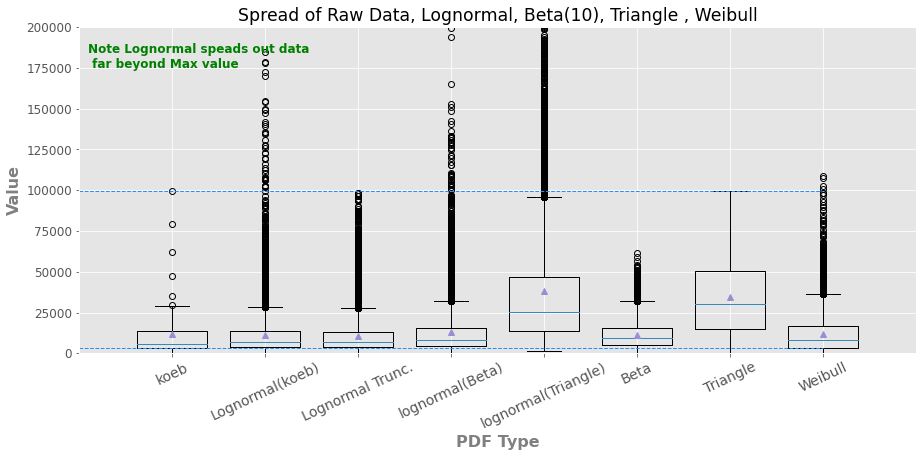

In [12]:
list=[1,2,3,4,5,6,7,8]
figdata = [koeb, lnvals, qln, b_lnvals, t_lnvals, bvals, tvals, wvals]
ticks = ['koeb','Lognormal(koeb)', 'Lognormal Trunc.', 'lognormal(Beta)', 'lognormal(Triangle)', 'Beta','Triangle', 'Weibull']

fig = plt.figure(figsize=(15,6))
plt.boxplot(figdata, widths=.75, notch=False, showmeans=True) # patch_artist=True
plt.xticks(list, ticks, fontsize=14, rotation=25)
plt.title('Spread of Raw Data, Lognormal, Beta(' +str(L)+ '), Triangle , Weibull')
plt.xlabel('PDF Type', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.xlim(0,9)
plt.ylim(0,200000)

plt.hlines(min, xmin=0, xmax=8, color='r', lw=1, linestyles='--')
plt.hlines(ml, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.hlines(max, xmin=0, xmax=8, color='dodgerblue', lw=1, linestyles='--')
plt.text(.1, 175000, 'Note Lognormal speads out data \n far beyond Max value',
        {'color':'green','weight':'heavy','size':12})
plt.show()

## Effect of Dispersion Factors on Beta Distributions
- The  Beta model can be a reasonable approach to modeling Lognormal distributions, but tends to underestimate the right tail.
- Beta's dispersion parameter (lambda) should be considered when modeling these strongly skewed distributions
- This sections demonstrates the effect of lambda on the distributions.

### Compare Beta PDFs with different dispersion factrors (lambda)

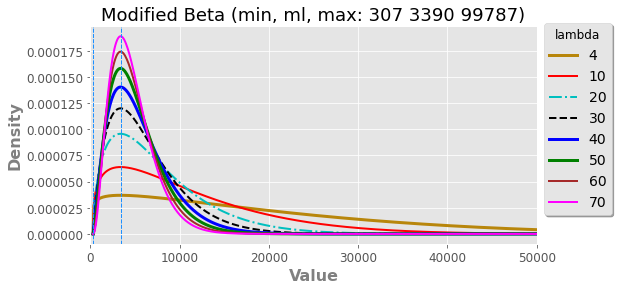

In [13]:
# Loop through Lambda values to be evaluated
L=[4, 10, 20, 30, 40, 50, 60, 70] 
for i in L:
    a=1+i*(ml-min)/(max-min)
    b=1+i*(max-ml)/(max-min)
    
    globals()["by_"+str(i)] = beta.pdf(bx, a, b, loc=min, scale=max-min)
    globals()["bvals_"+str(i)] =beta.rvs(a, b, loc=min, scale=max-min, size=size, random_state=None)
    
bx = np.linspace(min, max, 1000)

# Plotting    
fig = plt.figure(figsize=(8,4))

plt.plot(bx, by_4  ,lw=3, c='darkgoldenrod', ls='-', label='4')
plt.plot(bx, by_10 ,lw=2, c='r', ls='-', label='10')
plt.plot(bx, by_20,lw=2, c='c', ls='-.', label='20')
plt.plot(bx, by_30,lw=2, c='k', ls='--', label='30')
plt.plot(bx, by_40,lw=3, c='b', ls='-', label='40')
plt.plot(bx, by_50,lw=3, c='g', ls='-', label='50')
plt.plot(bx, by_60,lw=2, c='brown', ls='-', label='60')
plt.plot(bx, by_70,lw=2, c='magenta', ls='-', label='70')
plt.title('Modified Beta (min, ml, max: '+ str(min)+' '+str(int(ml))+' ' + str(max)+')', fontsize=18)       
plt.xlabel('Value', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Density', fontsize =16, fontweight='bold', color='gray')
plt.legend(fontsize=14, title='lambda', shadow=True, bbox_to_anchor = (1.0, .1))
plt.xlim(0,50000)

plt.axvline(x=min, color='dodgerblue', lw=1, linestyle='--')
plt.axvline(x=ml,  color='dodgerblue', lw=1, linestyle='--')
plt.axvline(x=max, color='dodgerblue', lw=1, linestyle='--')
plt.axvline(x=min, color='dodgerblue', lw=1, linestyle='--')
plt.axvline(x=ml,  color='dodgerblue', lw=1, linestyle='--')
plt.axvline(x=max, color='dodgerblue', lw=1, linestyle='--')

plt.show()

### Compare Beta Box&Whisker Plots with different dispersion factors (Lambda)

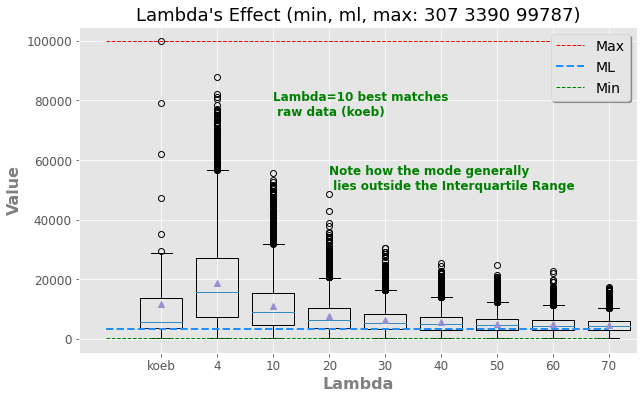

In [14]:

figdata=[koeb, bvals_4, bvals_10, bvals_20, bvals_30, bvals_40, bvals_50, bvals_60, bvals_70]

fig = plt.figure(figsize=(10,6))
plt.boxplot(figdata, widths=.75, showmeans=True) # patch_artist=True


plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['koeb','4','10','20','30','40', '50', '60', '70'])

plt.title("Lambda's Effect (min, ml, max: "+ str(min)+' '+str(int(ml))+' ' + str(max)+')', fontsize=18)
plt.xlabel('Lambda', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Value', fontsize =16, fontweight='bold', color='gray')

plt.hlines(max, xmin=0, xmax=9, color='r', lw=1, linestyles='--', label="Max")
plt.hlines(ml, xmin=0, xmax=9, color='dodgerblue', lw=2, linestyles='--', label="ML")
plt.hlines(min, xmin=0, xmax=9, color='g', lw=1, linestyles='--', label="Min")
plt.legend(shadow=True, fontsize=14)

plt.text(4, 50000, 'Note how the mode generally \n lies outside the Interquartile Range',
        {'color':'green','weight':'heavy','size':12})

plt.text(3, 75000, 'Lambda=10 best matches \n raw data (koeb)',
        {'color':'green','weight':'heavy','size':12})
plt.show()